In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.2 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.2 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/8.1 MB 1.2 MB/s eta 0:00:05
   ------------- --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


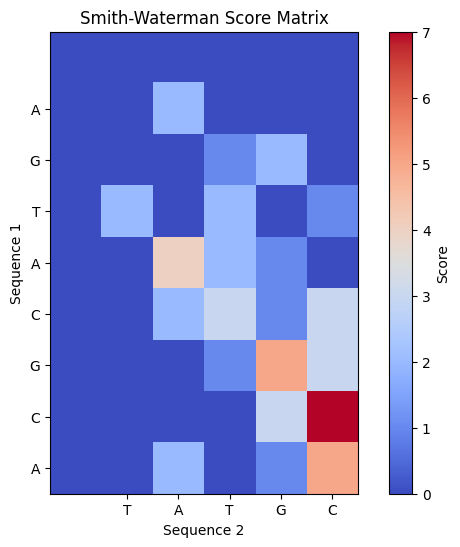

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def smith_waterman(seq1, seq2, match=2, mismatch=-1, gap=-2):
    rows, cols = len(seq1) + 1, len(seq2) + 1
    score_matrix = np.zeros((rows, cols), dtype=int)
    traceback = np.zeros((rows, cols), dtype=int)
    max_score, max_pos = 0, (0, 0)
    
    for i in range(1, rows):
        for j in range(1, cols):
            match_score = match if seq1[i-1] == seq2[j-1] else mismatch
            scores = [
                0,  # No negative scores (local alignment)
                score_matrix[i-1, j-1] + match_score,  # Diagonal (match/mismatch)
                score_matrix[i-1, j] + gap,  # Up (gap)
                score_matrix[i, j-1] + gap  # Left (gap)
            ]
            best_score = max(scores)
            score_matrix[i, j] = best_score
            traceback[i, j] = scores.index(best_score)
            
            if best_score > max_score:
                max_score, max_pos = best_score, (i, j)
    
    return score_matrix, traceback, max_pos

def visualize_matrix(matrix, seq1, seq2, title="Smith-Waterman Score Matrix"):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Score')
    plt.xticks(np.arange(1, len(seq2) + 1), list(seq2))
    plt.yticks(np.arange(1, len(seq1) + 1), list(seq1))
    plt.xlabel("Sequence 2")
    plt.ylabel("Sequence 1")
    plt.title(title)
    plt.show()

# Example usage
seq1 = "AGTACGCA"
seq2 = "TATGC"
score_matrix, traceback, max_pos = smith_waterman(seq1, seq2)
visualize_matrix(score_matrix, seq1, seq2)